# Pymaceuticals Inc.
---

### Analysis

* Assuming that the drug regimens are meant to reduce the growth of tumors, the Ramicane drug regimen is most effective with a mean tumor volume of 40.22 mm3, which compares similarly to the median tumor volume of 40.67 mm3, with a standard deviation of 4.85 mm3 and a fairly low standard error of mean at 32%. 

* The Ramicane drug regimen is closely followed by the Capomulin drug regimen. The Capomulin regimen data reflects a mean tumor volume of 40.68 mm3, which compares similarly to the median tumor volume of 41.56 mm3, with a standard deviation of 4.99 mm3 and a fairly low standard error of mean at 33%. 

* No potential outliers were found in the Ramicane and Capomulin drug regimen tumor volume data.

* Unless there is declaration in the study confirming all mice started at the same tumor volume, a better measurement of the effectiveness of each drug regimen would be the change in tumor volume from first timepoint to last time point.

* For mice treated with the Capomulin regimen, their weight in grams is strongly correlated with their average tumor volume (measured in mm3), this is substatinated by the Pearson Correlation Coefficient of 0.84.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number = len(mouse_df["Mouse ID"].unique())
mice_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = mouse_df[mouse_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_mouse.head(10)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_g989 = mouse_df.loc[(mouse_df["Mouse ID"] == "g989")]
duplicate_g989.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_g989 = mouse_df[(mouse_df["Mouse ID"] == "g989")].index
mouse_df.drop(index_g989, inplace = True)
mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(mouse_df["Mouse ID"].unique())
mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = mouse_df.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
median_tumor_volume = mouse_df.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_variance = mouse_df.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_SD = mouse_df.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
tumor_volume_SEM = mouse_df.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
mice_summary = pd.DataFrame({"Mean Tumor Volume": pd.Series(mean_tumor_volume),
                             "Median Tumor Volume": pd.Series(median_tumor_volume),
                             "Tumor Volume Variance": pd.Series(tumor_volume_variance),
                             "Tumor Volume Std. Dev.": pd.Series(tumor_volume_SD),
                             "Tumor Volume Std. Err.": pd.Series(tumor_volume_SEM)})

mice_summary.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mice_agg_summary = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean","median","var","std","sem"])
mice_agg_summary.head(10)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
# Setting variable for x axis labels using mouse_df DataFrame
drug = mouse_df["Drug Regimen"].unique()

# Setting variable to count the number of Mouse ID using mouse_df DataFrame
observations = mouse_df.groupby(["Drug Regimen"]).count()["Mouse ID"]

# Creating DataFrame reflecting each drug regimen and the mice count in each drug regimen
drug_observations_df = pd.DataFrame(observations)

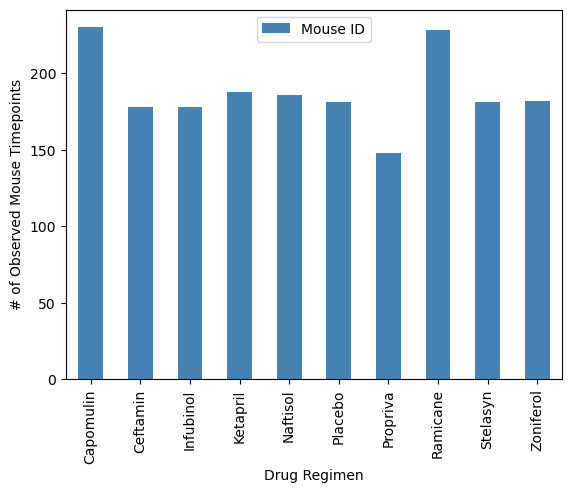

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_observations_df.plot(kind = "bar", color = "steelblue")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

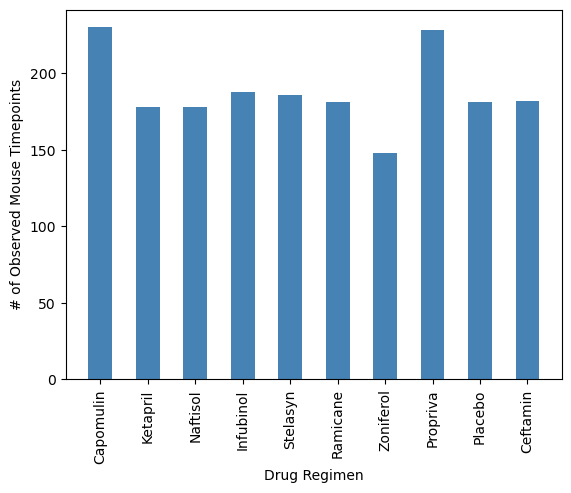

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug, observations, color = "steelblue", align = "center", width = 0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [12]:
# Setting variable to count the number of each gender of mice using mouse_df DataFrame
sex_count = mouse_df.groupby(["Sex"]).count()["Mouse ID"]

# Creating DataFrame reflecting each gender of mice and the mice count in each category
sex_count_df = pd.DataFrame(sex_count)

# Setting variable for category labels using above DataFrame
sex_labels = sex_count.index

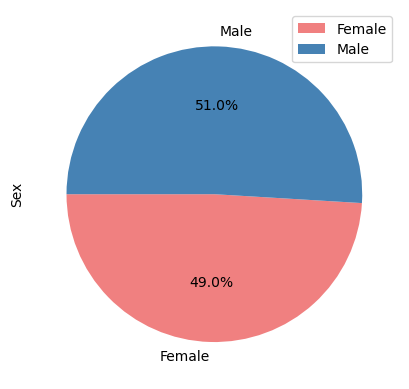

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count_df.plot(kind = "pie", colors = ["lightcoral", "steelblue"],
                  autopct="%1.1f%%", startangle=180, subplots=True)
plt.ylabel("Sex")
plt.show()

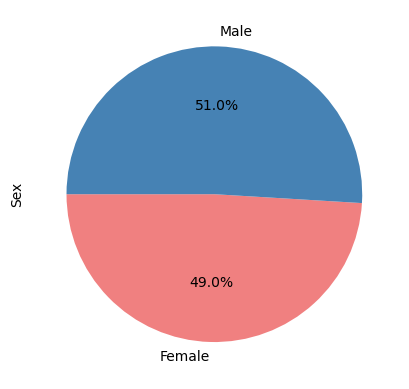

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_count, labels = sex_labels, colors = ["lightcoral", "steelblue"],
        autopct="%1.1f%%", startangle=180)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Creating a DataFrame containing only the results related to the above four drug regimens
mouse_4drug_df = mouse_df[(mouse_df["Drug Regimen"] == "Capomulin") | 
                          (mouse_df["Drug Regimen"] == "Ramicane") | 
                          (mouse_df["Drug Regimen"] == "Infubinol") | 
                          (mouse_df["Drug Regimen"] == "Ceftamin")]

# Search for duplicates using "Mouse ID" and dropped all associated rows except for the final row
# As Timepoint data is in ascending order, the final associated row is the data for the last Timepoint
# Create a new DataFrame containing only the data for each mouse at the final observed Timepoint
# Previous index dropped
mouse_last_timepoint_df = mouse_4drug_df.drop_duplicates(subset=["Mouse ID"], keep="last")
mouse_last_timepoint_df = mouse_last_timepoint_df.reset_index(drop = True)
mouse_last_timepoint_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drug_names = mouse_last_timepoint_df["Drug Regimen"].unique()

# Set variable to pull tumor volume data for each drug regimen
capomulin_tumor_volume = mouse_last_timepoint_df["Tumor Volume (mm3)"][
    (mouse_last_timepoint_df["Drug Regimen"] == "Capomulin")]

ramicane_tumor_volume = mouse_last_timepoint_df["Tumor Volume (mm3)"][
    (mouse_last_timepoint_df["Drug Regimen"] == "Ramicane")]

infubinol_tumor_volume = mouse_last_timepoint_df["Tumor Volume (mm3)"][
    (mouse_last_timepoint_df["Drug Regimen"] == "Infubinol")]

ceftamin_tumor_volume = mouse_last_timepoint_df["Tumor Volume (mm3)"][
    (mouse_last_timepoint_df["Drug Regimen"] == "Ceftamin")]

# Create dictionary:
# Setting each drug regimen as the key and the associated tumor volume as the value
drug_tumor = {"Capomulin": capomulin_tumor_volume,
              "Ramicane": ramicane_tumor_volume,
              "Infubinol" : infubinol_tumor_volume,
              "Ceftamin": ceftamin_tumor_volume}

# Creating list to write outlier output
outliers_list = []

# Nested for loop running the drug names against drug_tumor data
for regimen in drug_names:
    for drug, tumor in drug_tumor.items():
        # Conditional to calculate IQR and potential outliers for each drug regimen
        if drug == regimen:
            # Setting the quantiles
            quartiles = tumor.quantile([.25,.5,.75])
            # Calculating the lower quartile
            lowerq = quartiles[0.25]
            # Calculating the uppder quartile
            upperq = quartiles[0.75]
            # Calculating the IQR
            iqr = upperq-lowerq
            # Calculating the lower bound
            lower_bound = lowerq - (1.5*iqr)
            # Calculating the upper bound
            upper_bound = upperq + (1.5*iqr)
            # Locating potential outliers using lower_bound and upper_bound
            outliers = drug_tumor[regimen][(tumor < lower_bound) | (tumor > upper_bound)]
            # Write outlier output to outliers_list
            outliers_list.append(f"{regimen}'s potential outliers: {outliers}")

# Generating outlier output
outliers_list

["Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)",
 "Infubinol's potential outliers: 4    36.321346\nName: Tumor Volume (mm3), dtype: float64",
 "Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)",
 "Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)"]

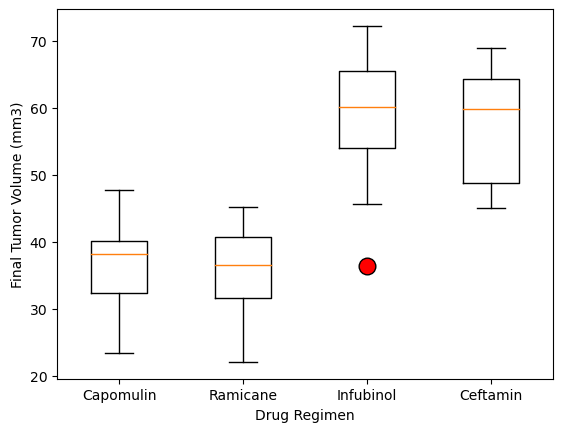

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(drug_tumor.values(), flierprops=dict(markerfacecolor="red", markersize=12))
ax1.set_xticklabels(drug_tumor.keys())
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

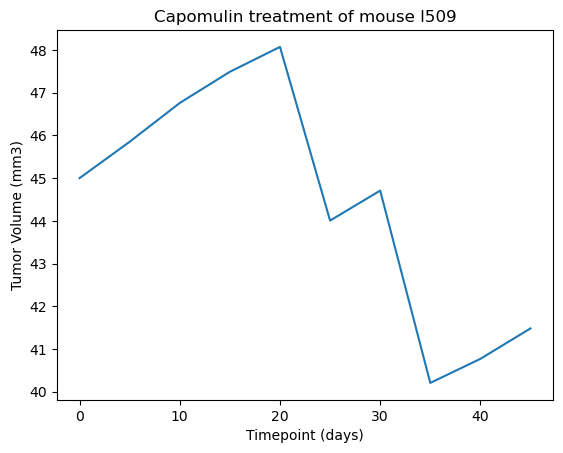

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Setting variable for Timepoint data for Mouse ID I509
time_line_l509 = mouse_df["Timepoint"][(mouse_df["Mouse ID"] == "l509")]

# Setting variable for tumor volume data for Mouse ID I509
tumor_volume_l509 = mouse_df["Tumor Volume (mm3)"][(mouse_df["Mouse ID"] == "l509")]

# Generating the line plot
plt.plot(time_line_l509, tumor_volume_l509)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


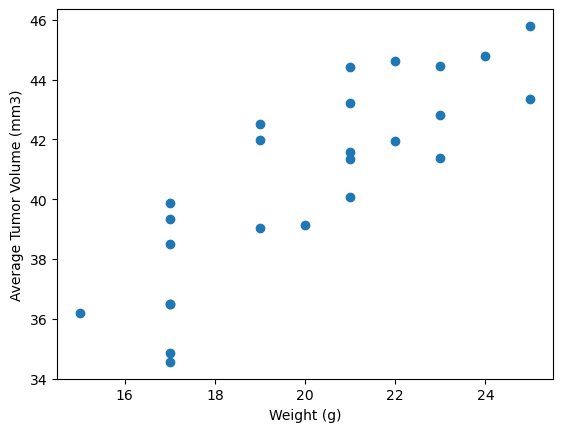

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Creating a new DataFrame filtered for Capomulin, averaging the tumor volume data per Mouse ID
capomulin_avg_tumor_df = pd.DataFrame(mouse_df[(mouse_df["Drug Regimen"] == "Capomulin")].groupby(
    ["Mouse ID"]).mean(numeric_only=True)["Tumor Volume (mm3)"])

# Setting variable to filter mouse_last_time_poiint_df for only the Capomulin drug regimen
capomulin_last_timepoint = mouse_last_timepoint_df[(mouse_last_timepoint_df["Drug Regimen"] == "Capomulin")]

# Setting variable to pull only the "Mouse ID" and "Weight (g)" column of above variable
capomulin_mouse_weight = capomulin_last_timepoint[["Mouse ID", "Weight (g)"]]

# Merging the above variable into capomulin_avg_tumor_df DataFrame on "Mouse ID" column
# Create new DataFrame containing only "Mouse ID", average tumor weight of each mouse and "Weight (g)" of each mouse
capomulin_weight_tumor = pd.merge(capomulin_avg_tumor_df, capomulin_mouse_weight, how = "left", on=["Mouse ID"])

# Setting variables, "Weight (g)" for x axis and "Tumor Volume (mm3)" for y axis
capomulin_weight = capomulin_weight_tumor["Weight (g)"]
capomulin_avg_tumor = capomulin_weight_tumor["Tumor Volume (mm3)"]

# Generating scatter plot
plt.scatter(capomulin_weight, capomulin_avg_tumor)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


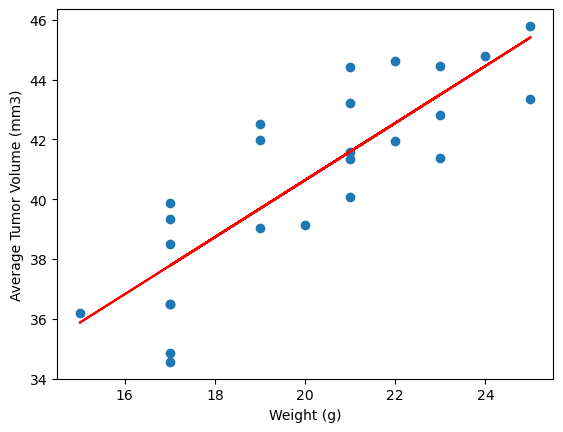

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculating correlation coefficient between mice weight and average tumor volume
correlation_weight_avg_tumor = st.pearsonr(capomulin_weight, capomulin_avg_tumor)
# Printing output of r-value
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_weight_avg_tumor[0],2)}")

# Calculating regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_weight, capomulin_avg_tumor)
regress_values = capomulin_weight * slope + intercept

# Generating scatter plot with line regression
plt.scatter(capomulin_weight, capomulin_avg_tumor)
plt.plot(capomulin_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()